## Task

Use the image `candy.jpg` for this task!

Count the how many:
* colors are on the picture
* what is the proportion of each type of candy on the picture!

---

Visible colors to the eye: 
- white
- pink
- yellow
- blue
- red
- green
- orange


In [1]:
#Packages
import cv2
import numpy as np
import matplotlib.pyplot as plt

from scipy.signal import find_peaks

hsv_max_values = np.array([180, 256, 256])
FS = 20 # fontsize for images
shift_of_color_wheel = 9 # [°] for the HSV format hue parameter

Size of picture: 1069 x 736 pixel


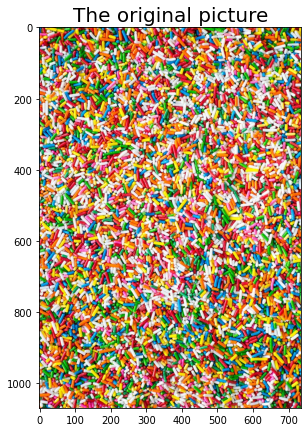

In [2]:
# Load image and show it
img_bgr = cv2.imread('data/candy.jpg') # in BGR format
size = img_bgr.shape
print(f'Size of picture: {size[0]} x {size[1]} pixel')

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # convert to RGB

plt.figure(figsize=(10, 7))
plt.imshow(img_rgb)
plt.title('The original picture', fontsize=FS)
plt.show()

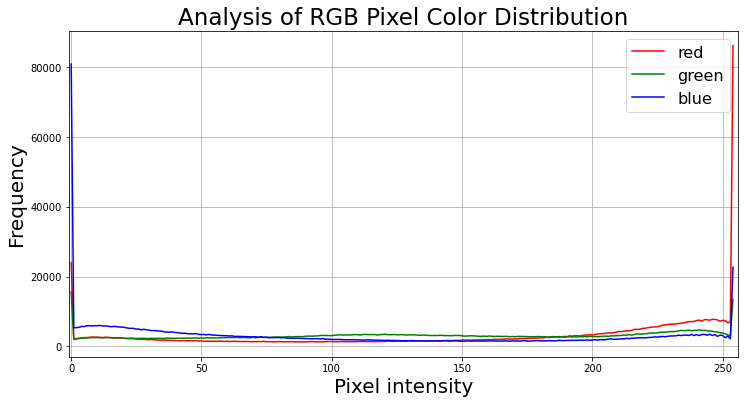

In [3]:
# the distribution of the red, green and blue pixels
colors = ('red', 'green', 'blue')
plt.figure(figsize=(12, 6))

for i in range(3):
    hist, bins_rgb = np.histogram(img_rgb[:,:,i], range = (0, 255), bins = 256)
    plt.plot(bins_rgb[:-1], hist, '-', color = colors[i], label = colors[i])
    
plt.title('Analysis of RGB Pixel Color Distribution', fontsize=FS+3)
plt.xlabel('Pixel intensity', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(-1, 256)
plt.legend(fontsize=FS-4)
plt.grid()
plt.show()

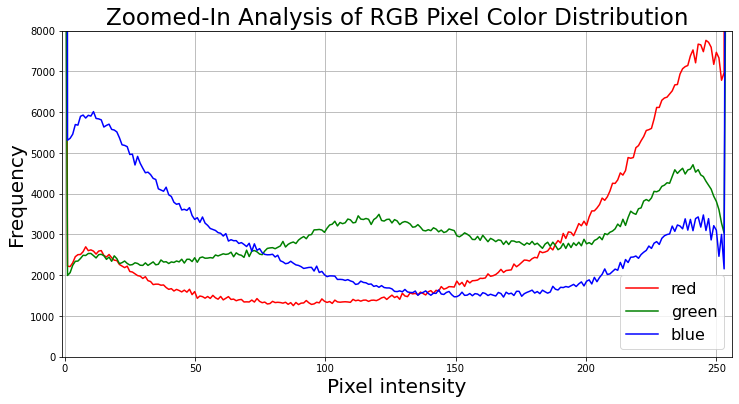

In [4]:
colors = ('red', 'green', 'blue')
plt.figure(figsize=(12, 6))

for i in range(3):
    hist, bins_rgb = np.histogram(img_rgb[:,:,i], range = (0, 255), bins = 256)
    plt.plot(bins_rgb[:-1], hist, '-', color = colors[i], label = colors[i])
plt.title('Zoomed-In Analysis of RGB Pixel Color Distribution', fontsize=FS+3)
plt.xlabel('Pixel intensity', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(-1, 256)
plt.ylim(0,8000)
plt.legend(fontsize=FS-4)
plt.grid()
plt.show()

The zoomed figure does not contains information about the the of colors due to that the colors of the visible scpetra. We could say the sum of the peaks could be a color of the figure, but it is not true. 

---

Instead of RGB format let us use the HSV format which countains the hue, the saturation and the value. The HSV color space is the following. 


<img src="data/hsv_1.png" style="width:30%; margin: auto">
<img src="data/hsv_2.png" style="width:50%; margin: auto">


The hue is the color wheel of the visible spectra.

HSV hue spectrum: [LifeWire](https://www.lifewire.com/what-is-hsv-in-design-1078068) webpage
- Red falls between 0 and 60 degrees.
- Yellow falls between 61 and 120 degrees.
- Green falls between 121 and 180 degrees.
- Cyan falls between 181 and 240 degrees.
- Blue falls between 241 and 300 degrees.
- Magenta falls between 301 and 360 degrees.

OpenCV uses 0-180° [CVexplained.Wordpress](https://cvexplained.wordpress.com/2020/04/28/color-detection-hsv/)
- Red falls between 0 and 30 degrees.
- Yellow falls between 31 and 60 degrees.
- Green falls between 61 and 90 degrees.
- Cyan falls between 91 and 120 degrees.
- Blue falls between 121 and 150 degrees.
- Magenta falls between 151 and 180 degrees.

For the exact color wheel we will use a shift with 9° (see `shift_of_color_wheel` variable).

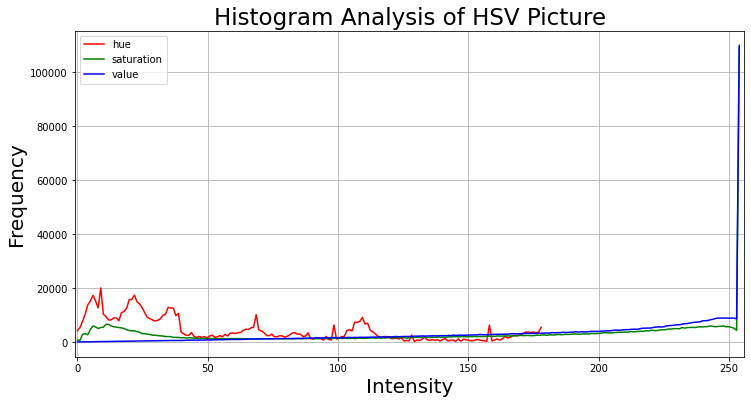

In [5]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV) # convert to HSV

#shift of color wheel
img_hsv[:,:,0] = (img_hsv[:,:,0]+shift_of_color_wheel)%180


hsv = ['hue', 'saturation', 'value']
plt.figure(figsize=(12, 6))
for i in range(3):
    hist, bins_hsv = np.histogram(img_hsv[:,:,i], range = (0,hsv_max_values[i]-1), bins = hsv_max_values[i])
    plt.plot(bins_hsv[:-1], hist, '-', color = colors[i], label = hsv[i])
plt.title('Histogram Analysis of HSV Picture', fontsize=FS+3)
plt.xlabel('Intensity', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(-1, 256)
plt.legend(loc='upper left')
plt.grid()

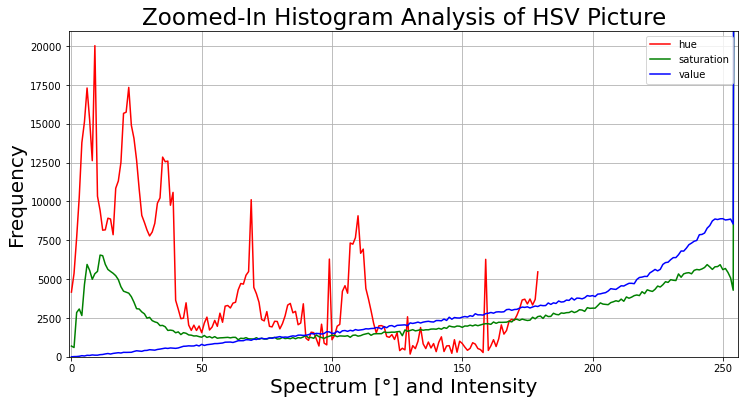

In [6]:
plt.figure(figsize=(12, 6))
for i in range(3):
    hist, bins_hsv = np.histogram(img_hsv[:,:,i], range = (0,hsv_max_values[i]), bins = hsv_max_values[i])
    plt.plot(bins_hsv[:-1], hist, '-', color = colors[i], label = hsv[i])
plt.title('Zoomed-In Histogram Analysis of HSV Picture', fontsize=FS+3)
plt.xlabel('Spectrum [°] and Intensity', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(-1, 256)
plt.ylim(0, 21000)
plt.legend(loc='upper right')
plt.grid()

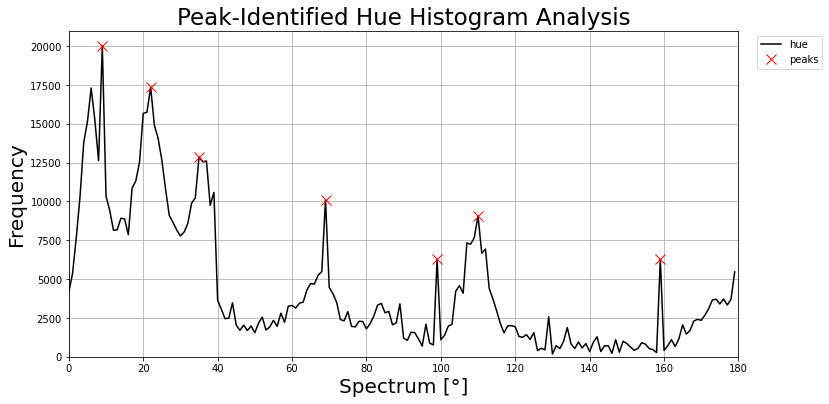

In [7]:
hue, bins = np.histogram(img_hsv[:,:,0], range=(0,180), bins=180)

peaks = find_peaks(hue, height=6000, distance=10, width=0.3, rel_height=0.16)

plt.figure(figsize=(12, 6))
plt.plot(bins[:-1], hue, '-', c='k', label='hue')
plt.plot(peaks[0], peaks[1]['peak_heights'], 'x', c='r', label='peaks', ms=10)
plt.title('Peak-Identified Hue Histogram Analysis', fontsize=FS+3)
plt.xlabel('Spectrum [°]', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(0, 180)
plt.ylim(0, 21000)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()

In [8]:
# create an array, with the peaks hues and maxiumu saturation and value
peaks_color_hsv = np.append(peaks[0], np.ones(peaks[0].shape[0]*2)*255).reshape(3,-1).T

# Convert HSV to RGB
peaks_color_rgb = cv2.cvtColor(peaks_color_hsv.astype('uint8').reshape(1, -1, 3), cv2.COLOR_HSV2RGB)

In [9]:
# create a 'continuous' spectrum in rgb
N = 2000
possible_hsv_colors = np.append(np.linspace(0, 179, N, ), np.ones((N, 2))*255).reshape(3,-1).T
# shift of color wheel
possible_hsv_colors[:,0] = (possible_hsv_colors[:,0]-shift_of_color_wheel)%180
# Convert the hvs data to rgb
hsv_spectrum_in_rgb = cv2.cvtColor(possible_hsv_colors.astype('uint8').reshape(1, -1, 3), cv2.COLOR_HSV2RGB)[0]

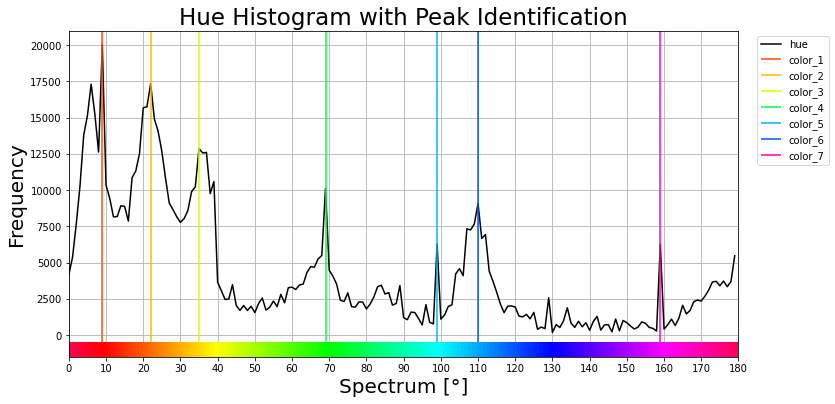

In [10]:
# hue histogram with peaks and spectrum
plt.figure(figsize=(12, 6))
plt.plot(bins[:-1], hue, '-', c='k', label='hue')
for i, p in enumerate(peaks[0]):
    plt.vlines(p, -500, 21000, colors=peaks_color_rgb[0][i]/255, label=f'color_{i+1}')
    
for i in range(N):
    plt.vlines(i/N*180, -1500, -500, colors=hsv_spectrum_in_rgb[i]/255)

plt.title('Hue Histogram with Peak Identification', fontsize=FS+3)
plt.xlabel('Spectrum [°]', fontsize=FS)
plt.ylabel('Frequency', fontsize=FS)
plt.xlim(0, 180)
plt.ylim(-1500, 21000)
plt.xticks(np.arange(0,181, 10,))
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.grid()
plt.show()

- The number of peaks contains information about the possible colors, but hue does not contain white as a color (because it is not a color).
- On the figure we can see only on type of blue.

So there are 7  types of candy.

---
# What is the proportion of each type of candy on the picture

The candies are covered, so not all of them are fully visible. Due to the uniformity of distribution, we can assume that the proportion of pixels of a given color in the image corresponds to the true distribution of candy colors.

Due to the color wheel shift, and the orange color we will use boundaries as perceived by the eye.

In [15]:
peaks_color_str = ['white', 'red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'pink']

# Boundaries as perceived by the eye
boundaries = np.array([[0,18], [19, 30], [31, 43], [44, 80], [81, 104], [105, 141], [142, 180]])
boundary_distances = np.diff(boundaries).reshape(-1)

print('COLOR \t\t BOUNDAIES \t RANGE')
for i in range(len(boundaries)):
    if i<4:
        print(f'{peaks_color_str[i+1]} \t\t {boundaries[i,0]}-{boundaries[i,1]} \t\t {boundary_distances[i]}')
    else:
        print(f'{peaks_color_str[i+1]} \t\t {boundaries[i,0]}-{boundaries[i,1]} \t {boundary_distances[i]}')


COLOR 		 BOUNDAIES 	 RANGE
red 		 0-18 		 18
orange 		 19-30 		 11
yellow 		 31-43 		 12
green 		 44-80 		 36
cyan 		 81-104 	 23
blue 		 105-141 	 36
pink 		 142-180 	 38


In [12]:
# white:
white = np.logical_and(img_hsv[:,:,1] < 255*0.1, img_hsv[:,:,2] > 255*0.9)
white_distr = np.sum(white) / (size[0]*size[1])*100
print(f'The white candies covers around the {np.round(white_distr, 2)}% of the picture.')
distributions = [white_distr]

# colors:
mask_of_darker_region = np.logical_and(img_hsv[:,:,1] > 255*0.5, img_hsv[:,:,2] > 255*0.5)
for i, b in enumerate(boundaries):
    mtx = np.logical_and(np.logical_and(img_hsv[:,:,0] >= b[0], img_hsv[:,:,0] <= b[1]), mask_of_darker_region)
    distr = np.sum(mtx) / (size[0]*size[1])*100
    distributions.append(distr)
    print(f'The {peaks_color_str[i+1]} candies covers around the {np.round(distr, 2)}% of the picture.')
    
total = np.sum(distributions)
print(f'\nTotal of percentages: {np.round(total, 2)}%')

The white candies covers around the 10.88% of the picture.
The red candies covers around the 15.59% of the picture.
The orange candies covers around the 13.27% of the picture.
The yellow candies covers around the 8.79% of the picture.
The green candies covers around the 6.16% of the picture.
The cyan candies covers around the 1.88% of the picture.
The blue candies covers around the 5.12% of the picture.
The pink candies covers around the 1.97% of the picture.

Total of percentages: 63.65%


The total of percentages is not 100.0% due to the mask of darker region.

In [13]:
distributions_sorted, peaks_color_str_sorted = zip(*sorted(zip(distributions/total*100,  peaks_color_str), reverse=True))

print('The proportion of each type of candy:')
for i, c in enumerate(peaks_color_str_sorted):
    print(f'{i+1}. - {c} - {np.round(distributions_sorted[i], 2)}%')

The proportion of each type of candy:
1. - red - 24.49%
2. - orange - 20.84%
3. - white - 17.09%
4. - yellow - 13.81%
5. - green - 9.68%
6. - blue - 8.04%
7. - pink - 3.09%
8. - cyan - 2.95%
